Name: Tarun Tanmay

Class: MBATech CE

Roll No: N049

SAP ID: 70471018055

In [ ]:
#Experiment 9 
#Use LSTM to predict stock price 

LSTM stands for 'long short-term memory' in deep learning which is a recurrent neural netowk (RNN)

Importing Libraries:

In [4]:
import numpy as np #numpy arrays for mathematical computations
import matplotlib.pyplot as plt #for visualising the data in graphical form
import pandas as pd #to read our csv file for preprocessing and further operations

In [5]:
dataset_train=pd.read_csv('NSE-TATAGLOBAL.csv') #reading the input data csv file
dataset_train.head() #summarising what's in the input data csv file

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
dataset_train.shape

(2035, 8)

2035 rows and 8 columns, data given for each (7) days. 

In [7]:
training_set=dataset_train.iloc[:,1:2] #we take only the first column which is open, and select all the rows
training_set.head()

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55


In [8]:
training_set.shape

(2035, 1)

Now we have taken all the rows and only one column from our input dataset

Converting training_set values into numpy array

In [9]:
training_set=training_set.values

to get optimal results, we normalise all the values first

PREPROCESSING:

In [10]:
from sklearn.preprocessing import MinMaxScaler #Transform features by scaling each feature in a range of 0 and 1
scale=MinMaxScaler(feature_range=(0,1)) #we normalize the values, so that value is in range 0 to 1
training_set_scaled= scale.fit_transform(training_set) #MinMax Regularization

In [11]:
training_set_scaled.shape

(2035, 1)

The shape is still the same, column shows the stock price of 2035 rows of each day

In [12]:
training_set_scaled[10] #opening value of the stock on the 11th day

array([0.54845904])

In [13]:
#iniitialising matrix X-train and y_train
X_train=[]
y_train=[]
for i in range(60,2035):
  X_train.append(training_set_scaled[i-60:i,0]) # for i =60, rows from 0 to 59 will be appended as columns to X_train
  y_train.append(training_set_scaled[i,0]) # for i=60, rows from 60 to 2034 will append in y_train
X_train,y_train=np.array(X_train), np.array(y_train)

In [14]:
X_train.shape #2035 -60 = 1975, i.e. first 60 rows are not appended in X_train but all other rows with 60 columns are appended

(1975, 60)

In [15]:
y_train.shape #no column suggests that it is a vector not a matrix

(1975,)

In [16]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1)) #we reshape the X_train with one additional dimension

In [17]:
X_train.shape # now we have one more dimension

(1975, 60, 1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense #fully connected layer to the neural network
from keras.layers import LSTM #
from keras.layers import Dropout #to avoid overfitting, we use the dropout layer in our neural networks

BUILDING THE MODEL:

In [19]:
model=Sequential() #adding layers to our neural network model one by one

#First Hidden layer consists of 50 LSTM neurons
#1 Layer:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1))) #input layer will be LSTM which will use first column and the dimension of the training data
model.add(Dropout(0.2))

#2 Layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

#3 Layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

#4 Layer/ Output Layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1)) #output is 1, since we are trying to predict stock value of one day

COMPILING THE MODEL:

In [20]:
model.compile(optimizer='adam', loss="mean_squared_error") #we use mean_squred_error to calculate the loss 
#adam optimizer will handle sparse gradient 

FITTING THE MODEL:

In [21]:
model.fit(X_train, y_train, epochs=150, batch_size=32) # fitting the model, training it with 150 epochs

Epoch 1/150
62/62 [==============================] - 13s 103ms/step - loss: 0.0286
Epoch 2/150
62/62 [==============================] - 6s 102ms/step - loss: 0.0031
Epoch 3/150
62/62 [==============================] - 6s 103ms/step - loss: 0.0031
Epoch 4/150
62/62 [==============================] - 6s 102ms/step - loss: 0.0027
Epoch 5/150
62/62 [==============================] - 7s 105ms/step - loss: 0.0029
Epoch 6/150
62/62 [==============================] - 7s 106ms/step - loss: 0.0024
Epoch 7/150
62/62 [==============================] - 6s 105ms/step - loss: 0.0021
Epoch 8/150
62/62 [==============================] - 7s 106ms/step - loss: 0.0021
Epoch 9/150
62/62 [==============================] - 7s 105ms/step - loss: 0.0019
Epoch 10/150
62/62 [==============================] - 7s 106ms/step - loss: 0.0025
Epoch 11/150
62/62 [==============================] - 7s 106ms/step - loss: 0.0022
Epoch 12/150
62/62 [==============================] - 7s 108ms/step - loss: 0.0017
Epoch 13/150

In [22]:
dataset_test=pd.read_csv('tatatest.csv')
dataset_test.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [23]:
dataset_test.shape #16 rows and 8 columns in test dataset

(16, 8)

In [24]:
stock_price = dataset_test.iloc[:,1:2].values

In [25]:
stock_price.shape #we take all the rows and only 1 column

(16, 1)

In [26]:
test_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0) #2035 rows from training dataset, and 16 rows from testing dataset is concatenated
test_total.shape #2035+16 = 2051 rows in total

(2051,)

In [27]:
input_samples=test_total[len(dataset_train)-60:].values #last 60 values are taken now 
input_samples.shape #last 60 values are from training dataset, and 16 values from testing dataset

(76,)

60 + 16 = 76 rows in total

In [28]:
input_samples = input_samples.reshape(-1,1) #reshaping the input_samples
input_samples.shape

(76, 1)

In [29]:
input_samples=scale.transform(input_samples) 

In [30]:
X_test=[]
for i in range(60,76):
  X_test.append(input_samples[i-60:i,0]) #for i =60, 0 to 75 rows are appended in X_test
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [31]:
pred_stock_price=model.predict(X_test)
pred_stock_price=scale.inverse_transform(pred_stock_price) #predicting the stock prices

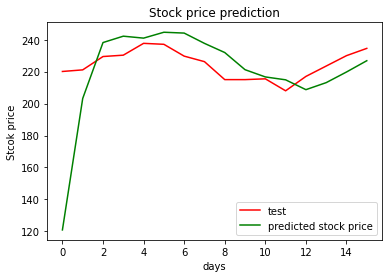

In [32]:
#setting green and red color respectively for predicted and test stock price
plt.plot(dataset_test['Open'],color='red', label='test')
plt.plot(pred_stock_price, color='green', label='predicted stock price') 
#setting labels for plotting graph
plt.title('Stock price prediction')
plt.xlabel('days')
plt.ylabel('Stcok price')
plt.legend()

CONCLUSION: 

1) The Graph shows that the foirst few days that the differnevce beetewwn the ios lagrge, this differnece reduce after the number of days are increased.  

2) Differnece can be reuduced by increasing the number of epochs.